# Estudo sobre a o ENEM durante a pandemia

## O estudo visá analisar os dados do enem durante a pandemia (2020,2021) e comparar com o ano anterior (2019) para, assim, entender os impactos causados na educação durante esse período

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile

In [ ]:
#Mostrar todos os arquivos que estão no arquivo zip
with zipfile.ZipFile('/content/drive/MyDrive/dados enem/microdados_enem_2019.zip') as z:
  print(*z.namelist(), sep='\n')

INPUTS/
INPUTS/INPUT_R_ITENS_PROVA_2019.R
INPUTS/INPUT_R_MICRODADOS_ENEM_2019.R
INPUTS/INPUT_SAS_ITENS_PROVA_2019.sas
INPUTS/INPUT_SAS_MICRODADOS_ENEM_2019.sas
INPUTS/INPUT_SPSS_ITENS_PROVA_2019.sps
INPUTS/INPUT_SPSS_MICRODADOS_ENEM_2019.sps
LEIA-ME E DOCUMENTOS TÉCNICOS/
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/enem_procedimentos_de_analise.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/entenda_a_sua_nota_no_enem_guia_do_participante.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf
PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2019_P1_CAD_01_DIA_1_AZUL.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_03_DIA_1_BRANCO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_

primeiramente usamos o dicionario dos microdados para ter uma melhor compreensão dos dados. Embora os dicionários possam ser iguais deve-se analisar se há alguma diferença entre eles

In [ ]:
#Como o arquivo é muito grande usamos o comando nrows=0
with zipfile.ZipFile('/content/drive/MyDrive/dados enem/microdados_enem_2019.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
    df_2019 = pd.read_csv(f, sep=';', encoding='ISO-8859-1', nrows= 0)


In [ ]:
df_2019.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

Podemos observar que num primeiro momento não iremos analisar todas as colunas do dataframe. Então, faremos uma seleção das colunas que queremos

In [ ]:
colunas = ['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA',
           'TP_ESCOLA', 'IN_TREINEIRO', 'SG_UF_PROVA',
           'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 
           'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
           'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO','Q001', 'Q002',
           'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 
           'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 
           'Q019', 'Q020', 'Q021', 'Q022','Q023', 'Q024', 'Q025']


## Análise de Tempo de execução

In [ ]:
#Como o arquivo é muito grande usamos o comando usecols para fazer a analise nas colunas desejadas
with zipfile.ZipFile('/content/drive/MyDrive/dados enem/microdados_enem_2019.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
     %time df_2019 = pd.read_csv(f, sep=';', encoding='ISO-8859-1', usecols=colunas)

CPU times: user 52.1 s, sys: 13.7 s, total: 1min 5s
Wall time: 1min 14s


In [ ]:
df_2019.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095171 entries, 0 to 5095170
Data columns (total 42 columns):
 #   Column             Dtype  
---  ------             -----  
 0   NU_ANO             int64  
 1   TP_FAIXA_ETARIA    int64  
 2   TP_SEXO            object 
 3   TP_COR_RACA        int64  
 4   TP_ESCOLA          int64  
 5   IN_TREINEIRO       int64  
 6   SG_UF_PROVA        object 
 7   TP_PRESENCA_CN     int64  
 8   TP_PRESENCA_CH     int64  
 9   TP_PRESENCA_LC     int64  
 10  TP_PRESENCA_MT     int64  
 11  NU_NOTA_CN         float64
 12  NU_NOTA_CH         float64
 13  NU_NOTA_LC         float64
 14  NU_NOTA_MT         float64
 15  TP_STATUS_REDACAO  float64
 16  NU_NOTA_REDACAO    float64
 17  Q001               object 
 18  Q002               object 
 19  Q003               object 
 20  Q004               object 
 21  Q005               int64  
 22  Q006               object 
 23  Q007               object 
 24  Q008               object 
 25  Q009              

# Carregar os arquivos

In [ ]:
#Como o arquivo é muito grande usamos o comando usecols para fazer a analise nas colunas desejadas
with zipfile.ZipFile('/content/drive/MyDrive/dados enem/microdados_enem_2019.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
    df_2019 = pd.read_csv(f, sep=';', encoding='ISO-8859-1', usecols=colunas)

In [ ]:
#Como o arquivo é muito grande usamos o comando usecols para fazer a analise nas colunas desejadas
with zipfile.ZipFile('/content/drive/MyDrive/dados enem/microdados_enem_2020.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2020.csv') as f:
    df_2020 = pd.read_csv(f, sep=';', encoding='ISO-8859-1', usecols=colunas)

In [ ]:
#Como o arquivo é muito grande usamos o comando usecols para fazer a analise nas colunas desejadas
with zipfile.ZipFile('/content/drive/MyDrive/dados enem/microdados_enem_2021.zip') as z:
  with z.open('DADOS/MICRODADOS_ENEM_2021.csv') as f:
    df_2021 = pd.read_csv(f, sep=';', encoding='ISO-8859-1', usecols=colunas)

# Análise exploratória


In [ ]:
print(len(df_2019['SG_UF_PROVA'].unique()))
print(len(df_2020['SG_UF_PROVA'].unique()))
print(len(df_2021['SG_UF_PROVA'].unique()))

27
27
27


In [ ]:
#pelo dicionario de dados do enem
index = {1 : 'Menor de 17 anos', 2 : '17 anos', 3 : '18 anos', 4: '19 anos', 5 : '20 anos', 6 : '21 anos', 7 : '22 anos', 8 : '23 anos', 9 : '24 anos', 10 : '25 anos',
         11 : 'Entre 26 a 30 anos', 12 : 'Entre 31 a 35 anos', 13 : 'Entre 36 a 40 anos', 14 : 'Entre 41 a 45 anos', 15 : 'Entre 46 a 50 anos', 16 : 'Entre 51 a 55 anos',
         17 : 'Entre 56 a 60 anos', 18 : 'Entre 61 a 65 anos', 19 : 'Entre 66 a 70 anos', 20 : 'Maior de 70 anos'}

In [ ]:
idades_2019 = df_2019[['NU_ANO', 'TP_FAIXA_ETARIA']].value_counts().sort_index().rename(index=index)
idades_2020 = df_2020[['NU_ANO', 'TP_FAIXA_ETARIA']].value_counts().sort_index().rename(index=index)
idades_2021 = df_2021[['NU_ANO', 'TP_FAIXA_ETARIA']].value_counts().sort_index().rename(index=index)

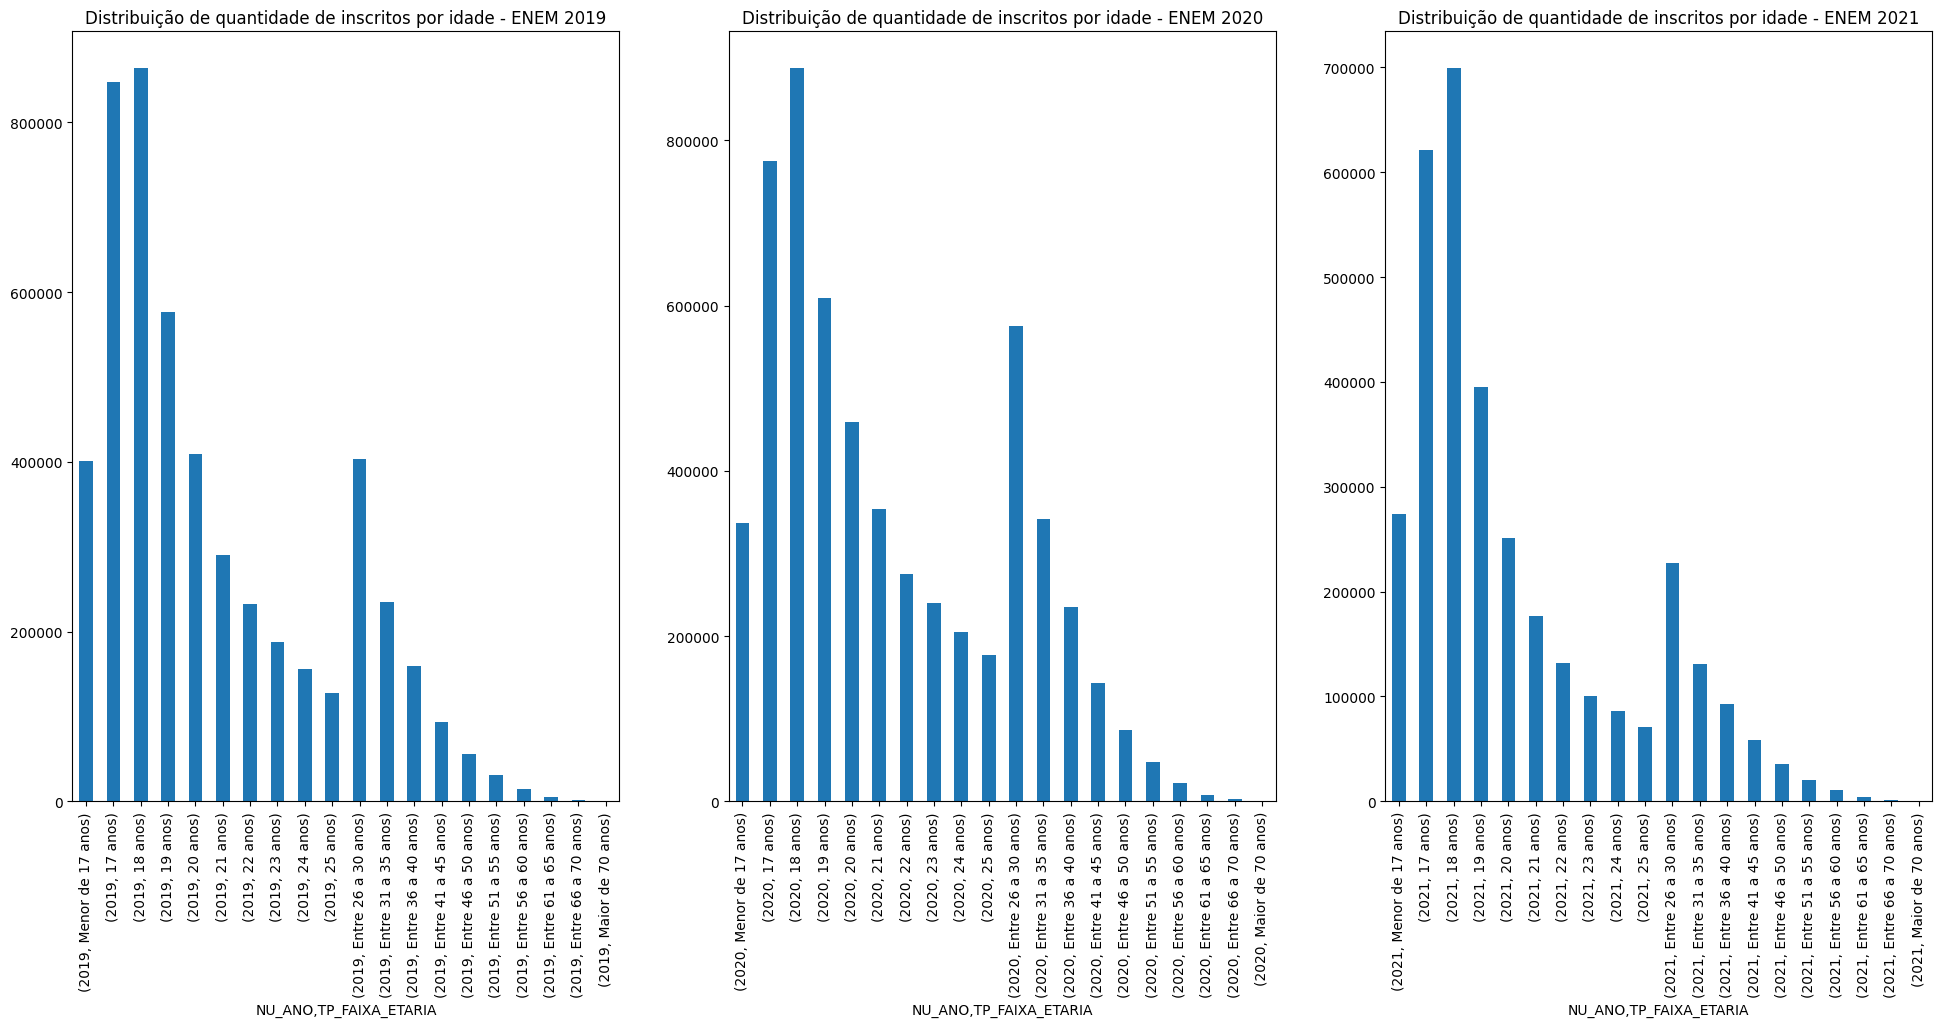

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,3,1)
plt.title('Distribuição de quantidade de inscritos por idade - ENEM 2019')
idades_2019.plot.bar()
plt.subplot(1,3,2)
plt.title('Distribuição de quantidade de inscritos por idade - ENEM 2020')
idades_2020.plot.bar()
plt.subplot(1,3,3)
plt.title('Distribuição de quantidade de inscritos por idade - ENEM 2021')
idades_2021.plot.bar()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pela distribuição de idade dos candidatos temos alguns aspectos interessantes:

1 - Os candidatos com maior frequência são os de 17 e 18 anos.

2 - Há um número relevante de candidatos entre 26 a 30 anos.

3- No ano de 2021, há uma diminuição grande do número de candidatos

Quanto a primeira análise por, normalmente, o fim do ensino médio ser nessa idade faz sentido que esses sejam os candidatos de maior frequência.

Quanto a segunda análise a primeira hipótese possa ser uma migração para mudança de formação(Verificar o questionário socio-economico para ter mais questões)

Na terceira análise a pandemia é o maior fator. (quanto tempo de ensino atrasado pelas escolas fechadas?, acesso a internet? (dificuldade com o EAD))

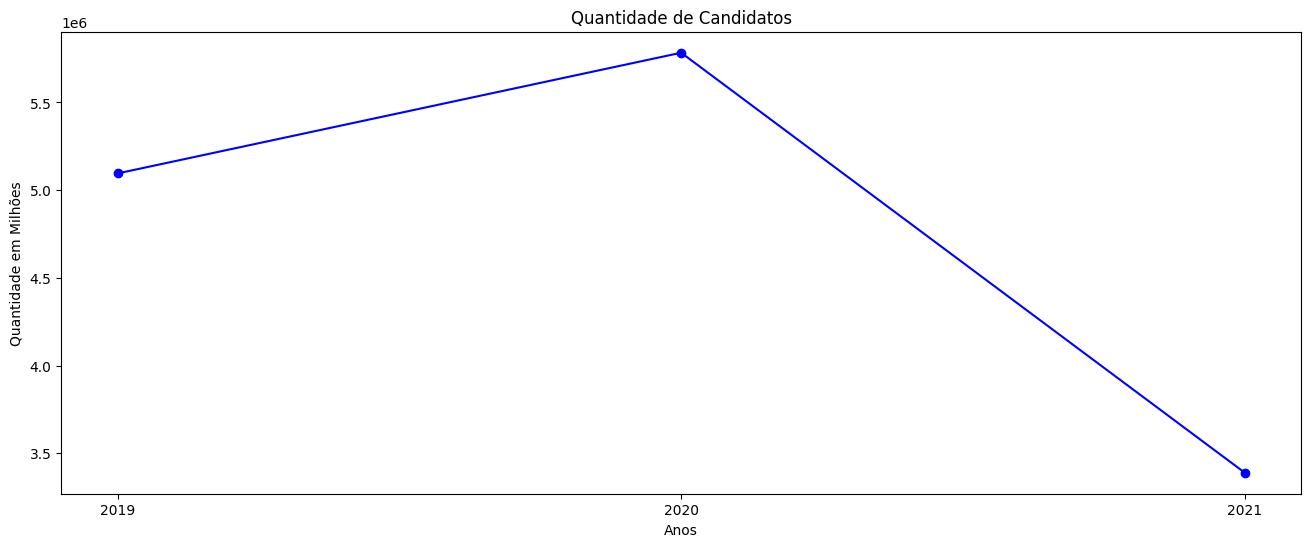

In [ ]:
x1 = sum(idades_2019)
x2 = sum(idades_2020)
x3 = sum(idades_2021)
quantidade = [x1, x2, x3]
ano = ['2019', '2020', '2021']
df = pd.DataFrame({'anos': ano, 'quantidade' : quantidade})
plt.figure(figsize=(16, 6))
plt.plot(df.anos, df.quantidade, 'o-b')
plt.title('Quantidade de Candidatos')
plt.xlabel('Anos')
plt.ylabel('Quantidade em Milhões')
plt.show()

Ao somar todos os canditados vemos que a interpretação visual dos graficos de barra é verdadeira quanto a quantidade de alunos no ano de 2021

In [ ]:
df_2019[['TP_PRESENCA_CH' , 'TP_PRESENCA_LC', 'TP_PRESENCA_CN' ,  'TP_PRESENCA_MT' ]].value_counts()

TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_CN  TP_PRESENCA_MT
1               1               1               1                 3701910
0               0               0               0                 1160010
1               1               0               0                  219244
0               0               1               1                    8027
2               2               0               0                    3670
1               1               2               2                    1892
2               2               1               1                     398
0               0               2               2                      16
2               2               2               2                       4
dtype: int64

In [ ]:
presentes1, faltantesdoisdias1, faltantesdiadois1, faltantesdiaum1, eliminadosdiaum1, eliminadosdiadois1, eliminadosdiaumpresentediadois1, faltanteeliminadodiadois1, eliminadosdoisdias1 =  df_2019[['TP_PRESENCA_CH' , 'TP_PRESENCA_LC', 'TP_PRESENCA_CN' ,  'TP_PRESENCA_MT' ]].value_counts()

In [ ]:
df_2020[['TP_PRESENCA_CH' , 'TP_PRESENCA_LC', 'TP_PRESENCA_CN' ,  'TP_PRESENCA_MT']].value_counts()

TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_CN  TP_PRESENCA_MT
0               0               0               0                 3016082
1               1               1               1                 2588681
                                0               0                  164066
0               0               1               1                    8482
2               2               0               0                    4095
1               1               2               2                    1393
2               2               1               1                     277
0               0               2               2                      26
2               2               2               2                       7
dtype: int64

In [ ]:
faltantesdoisdias2, presentes2, faltantesdiadois2, faltantesdiaum2, eliminadosdiaum2, eliminadosdiadois2, eliminadosdiaumpresentediadois2, faltanteeliminadodiadois2, eliminadosdoisdias2 =  df_2020[['TP_PRESENCA_CH' , 'TP_PRESENCA_LC', 'TP_PRESENCA_CN' ,  'TP_PRESENCA_MT' ]].value_counts()

In [ ]:
df_2021[['TP_PRESENCA_CH' , 'TP_PRESENCA_LC', 'TP_PRESENCA_CN' ,  'TP_PRESENCA_MT' ]].value_counts()

TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_CN  TP_PRESENCA_MT
1               1               1               1                 2238107
0               0               0               0                 1000150
1               1               0               0                  138851
0               0               1               1                    7229
2               2               0               0                    3538
1               1               2               2                    1421
2               2               1               1                     508
0               0               2               2                      18
2               2               2               2                      10
dtype: int64

In [ ]:
presentes3, faltantesdoisdias3, faltantesdiadois3, faltantesdiaum3, eliminadosdiaum3, eliminadosdiadois3, eliminadosdiaumpresentediadois3, faltanteeliminadodiadois3, eliminadosdoisdias3 =  df_2021[['TP_PRESENCA_CH' , 'TP_PRESENCA_LC', 'TP_PRESENCA_CN' ,  'TP_PRESENCA_MT' ]].value_counts()

In [ ]:
presentes_2019 = presentes1
faltantes_2019 = faltantesdoisdias1 + faltantesdiadois1 + faltantesdiaum1
eliminados_2019 = eliminadosdiaum1 + eliminadosdiadois1 + eliminadosdiaumpresentediadois1 + faltanteeliminadodiadois1 + eliminadosdoisdias1
presentes_2020 = presentes2
faltantes_2020 = faltantesdoisdias2 + faltantesdiadois2 + faltantesdiaum2
eliminados_2020 = eliminadosdiaum2 + eliminadosdiadois2 + eliminadosdiaumpresentediadois2 + faltanteeliminadodiadois2 + eliminadosdoisdias2
presentes_2021 = presentes3
faltantes_2021 = faltantesdoisdias3 + faltantesdiadois3 + faltantesdiaum3
eliminados_2021 = eliminadosdiaum3 + eliminadosdiadois3 + eliminadosdiaumpresentediadois3 + faltanteeliminadodiadois3 + eliminadosdoisdias3

In [ ]:
candidatos_2019 = [presentes_2019, faltantes_2019, eliminados_2019]
candidatos_2020 = [presentes_2020, faltantes_2020, eliminados_2020]
candidatos_2021 = [presentes_2021, faltantes_2021, eliminados_2021]

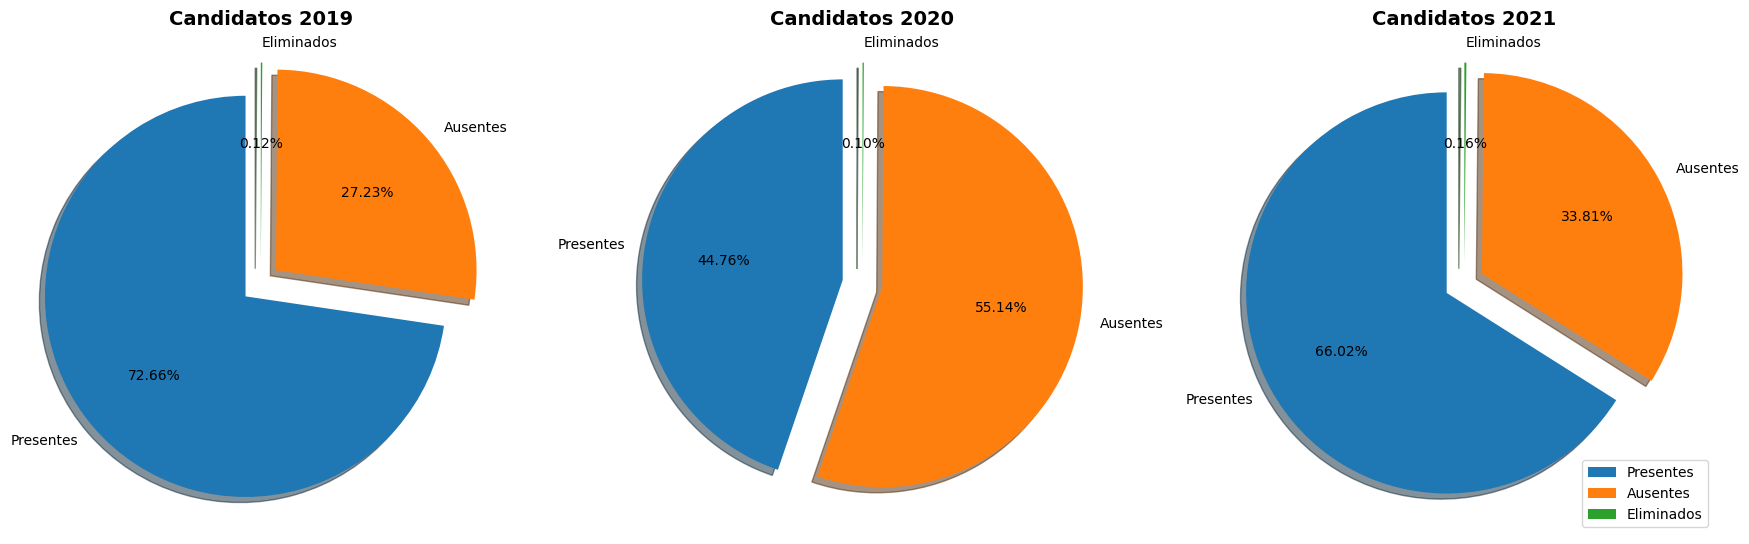

In [ ]:
plt.figure(figsize=(22,10))
labels = ['Presentes', 'Ausentes', 'Eliminados']
plt.subplot(1,3,1)
plt.pie(candidatos_2019, labels=labels, autopct='%0.2f%%', explode=[0.1,0.1,0.1], shadow=True, startangle= 90,)
plt.title('Candidatos 2019', size=14,fontweight="bold")
plt.subplot(1,3,2)
plt.pie(candidatos_2020, labels=labels, autopct='%0.2f%%', explode=[0.1,0.1,0.1], shadow=True, startangle= 90)
plt.title('Candidatos 2020', size=14,fontweight="bold")
plt.subplot(1,3,3)
plt.pie(candidatos_2021, labels=labels, autopct='%0.2f%%', explode=[0.1,0.1,0.1], shadow=True, startangle= 90)
plt.title('Candidatos 2021', size=14,fontweight="bold")
plt.legend(loc= 'lower right')
plt.show()

Embora tenhamos um aumento no numero dos candidatos do ano de 2019 para o ano de 2020. Pode-se ver que a abstenção dos candidatos foi maior que o número de presentes. 

Já em 2021 embora a abstenção tenha diminuido em comparação ao ano anterior a quantidade de candidatos foi muito menor como vimos anteriormente


In [ ]:
presentes = 'TP_PRESENCA_CH == 1 & TP_PRESENCA_LC == 1 & TP_PRESENCA_CN == 1 & TP_PRESENCA_MT == 1'
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

In [ ]:
df_2019['TP_PRESENCA_CH']

0          0
1          0
2          0
3          1
4          1
          ..
5095166    0
5095167    1
5095168    0
5095169    0
5095170    0
Name: TP_PRESENCA_CH, Length: 5095171, dtype: int64

<Axes: >

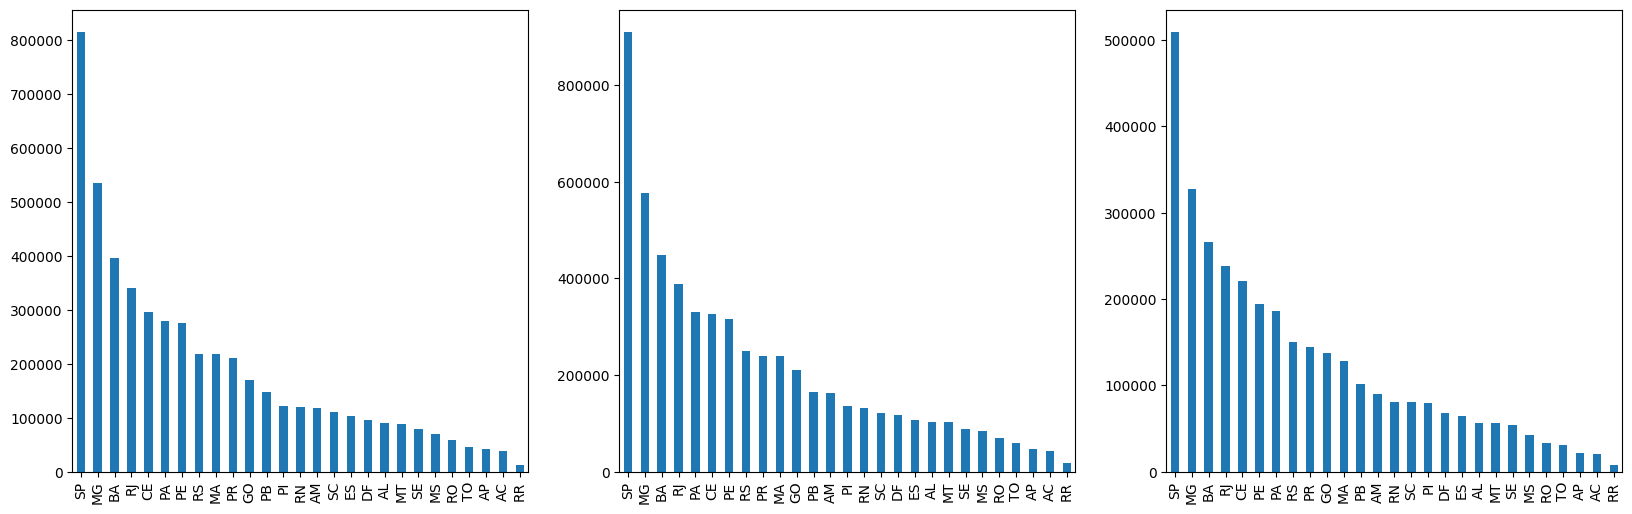

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
df_2019["SG_UF_PROVA"].value_counts().plot.bar()
plt.subplot(1,3,2)
df_2020["SG_UF_PROVA"].value_counts().plot.bar()
plt.subplot(1,3,3)
df_2021["SG_UF_PROVA"].value_counts().plot.bar()

In [ ]:
# Cria nova coluna para sumarizar as notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
df_2019["NU_NOTA_TOTAL"] = df_2019[provas].sum(axis=1)
df_2019.head(10)

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,2019,13,M,3,1,0,SP,0,0,0,...,A,A,A,A,A,C,A,C,B,0.0
1,2019,8,M,1,1,0,BA,0,0,0,...,A,A,B,A,A,E,A,A,B,0.0
2,2019,13,F,3,1,0,CE,0,0,0,...,A,A,B,A,A,C,A,A,B,0.0
3,2019,10,F,1,1,0,TO,1,1,1,...,A,A,C,A,B,D,A,B,B,2376.7
4,2019,7,F,1,1,0,MG,1,1,1,...,A,A,B,A,A,C,B,B,B,3196.8
5,2019,13,M,2,1,0,MT,1,1,1,...,A,A,B,A,A,E,A,B,B,3248.1
6,2019,7,F,3,1,0,BA,1,1,1,...,A,A,B,A,A,B,A,A,A,2674.9
7,2019,5,M,3,1,0,SP,0,0,0,...,A,A,B,A,A,C,A,A,B,0.0
8,2019,5,F,1,1,0,SP,0,0,0,...,A,A,B,A,A,B,B,A,A,0.0
9,2019,2,M,1,2,0,SP,1,1,1,...,A,A,B,A,B,C,B,B,B,2475.2


In [ ]:
# Cria nova coluna para sumarizar as notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
df_2020["NU_NOTA_TOTAL"] = df_2020[provas].sum(axis=1)
df_2020.head(10)

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,2020,11,F,2,1,0,PA,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2020,11,M,3,1,0,RN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3152.4
2,2020,4,F,3,2,0,BA,0,0,0,...,A,A,B,A,A,A,A,A,A,0.0
3,2020,2,M,3,2,0,SP,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3439.4
4,2020,4,F,3,1,0,MG,0,0,0,...,A,A,B,A,B,B,A,A,B,0.0
5,2020,3,F,3,1,0,RS,1,1,1,...,A,A,B,B,A,D,A,B,B,2834.9
6,2020,9,M,3,1,0,PE,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,2020,4,M,1,1,0,SP,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3124.7
8,2020,5,F,3,1,0,PB,1,1,1,...,A,A,B,A,A,C,A,A,A,2357.9
9,2020,2,M,2,2,0,CE,0,0,0,...,A,A,B,A,A,A,A,A,B,0.0


In [ ]:
# Cria nova coluna para sumarizar as notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
df_2021["NU_NOTA_TOTAL"] = df_2021[provas].sum(axis=1)
df_2021.head(10)

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,2021,5,F,1,1,0,MG,0,1,1,...,A,A,B,A,A,B,A,B,B,1807.2
1,2021,12,M,1,1,0,AL,1,1,1,...,A,A,B,A,A,C,A,A,A,2577.5
2,2021,13,F,1,1,0,SP,0,0,0,...,A,A,B,A,A,C,B,B,B,0.0
3,2021,3,M,3,2,0,CE,1,1,1,...,A,A,B,A,A,B,A,B,B,3338.0
4,2021,2,F,3,2,0,CE,1,1,1,...,A,A,B,A,B,E,A,B,B,2850.3
5,2021,10,F,3,1,0,CE,0,0,0,...,A,A,A,A,A,B,A,A,B,0.0
6,2021,9,F,3,1,0,RS,0,1,1,...,A,A,B,B,A,C,A,A,B,1412.3
7,2021,4,F,1,1,0,SP,0,0,0,...,A,A,C,B,A,D,B,B,B,0.0
8,2021,8,F,3,2,0,MG,1,1,1,...,A,A,B,A,A,B,A,A,B,2428.0
9,2021,4,F,3,2,0,BA,1,1,1,...,A,B,C,B,A,C,A,A,B,2334.7


In [ ]:
renda_ordenada = df_2019["Q006"].unique()
renda_ordenada

array(['A', 'C', 'B', 'E', 'G', 'D', 'F', 'J', 'I', 'K', 'H', 'O', 'Q',
       'M', 'P', 'L', 'N'], dtype=object)

In [ ]:
renda_ordenada2 = df_2020["Q006"].unique()
renda_ordenada2

array([nan, 'B', 'C', 'D', 'A', 'E', 'F', 'G', 'L', 'J', 'H', 'I', 'K',
       'N', 'O', 'Q', 'P', 'M'], dtype=object)

In [ ]:
array_para_lista = renda_ordenada2.tolist()
del array_para_lista[0]
renda_ordenada2 = np.asarray(array_para_lista)
type(renda_ordenada2)

numpy.ndarray

In [ ]:
type(renda_ordenada)

numpy.ndarray

In [ ]:
renda_ordenada3 = df_2021["Q006"].unique()
renda_ordenada3

array(['D', 'B', 'C', 'G', 'H', 'F', 'E', 'A', 'I', 'L', 'J', 'N', 'O',
       'K', 'M', 'Q', 'P', nan], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas total pela renda')

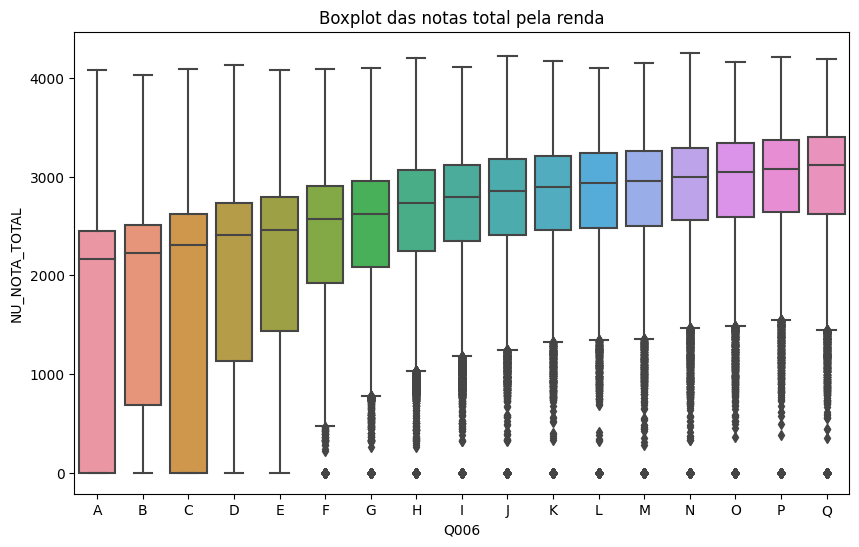

In [ ]:
renda_ordenada = df_2019["Q006"].unique()
renda_ordenada.sort()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = df_2019, order = renda_ordenada)
plt.title("Boxplot das notas total pela renda")

Text(0.5, 1.0, 'Boxplot das notas total pela renda')

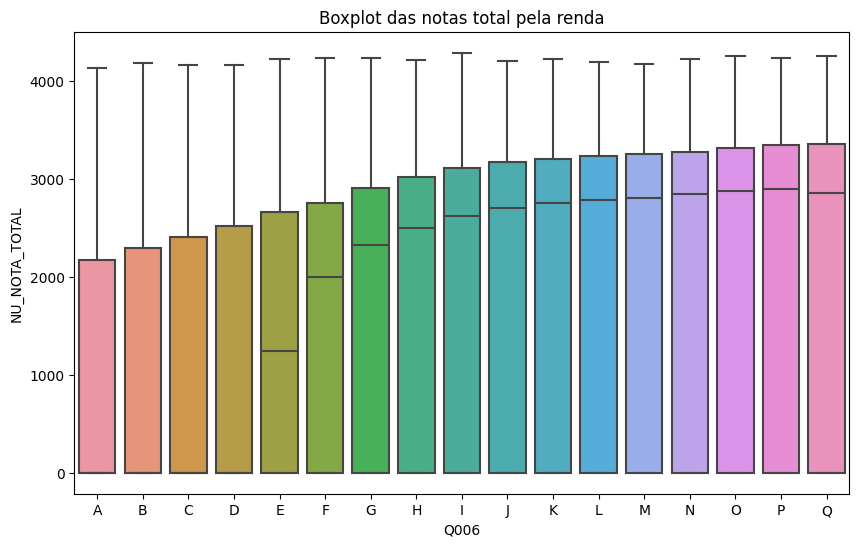

In [ ]:
renda_ordenada2 = df_2020["Q006"].unique()
array_para_lista = renda_ordenada2.tolist()
del array_para_lista[0]
renda_ordenada2 = np.asarray(array_para_lista)
renda_ordenada2.sort()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = df_2020, order = renda_ordenada2)
plt.title("Boxplot das notas total pela renda")

In [ ]:
renda_ordenada3

array(['D', 'B', 'C', 'G', 'H', 'F', 'E', 'A', 'I', 'L', 'J', 'N', 'O',
       'K', 'M', 'Q', 'P', nan], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas total pela renda')

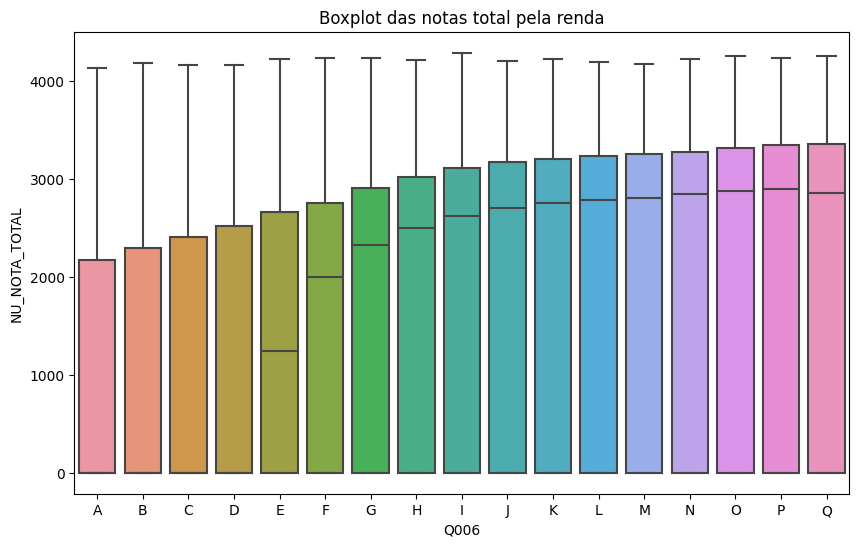

In [ ]:
renda_ordenada3 = df_2021["Q006"].unique()
array_para_lista = renda_ordenada3.tolist()
del array_para_lista[-1]
renda_ordenada3 = np.asarray(array_para_lista)
renda_ordenada3.sort()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = df_2020, order = renda_ordenada3)
plt.title("Boxplot das notas total pela renda")

In [ ]:
df_2019.query('IN_TREINEIRO == 1 & TP_FAIXA_ETARIA > 13')['TP_FAIXA_ETARIA' ].value_counts().sort_index().rename(index=index)

Entre 41 a 45 anos    373
Entre 46 a 50 anos    226
Entre 51 a 55 anos    138
Entre 56 a 60 anos     63
Entre 61 a 65 anos     22
Entre 66 a 70 anos     13
Maior de 70 anos        2
Name: TP_FAIXA_ETARIA, dtype: int64

In [ ]:
treineirosmais40 = df_2019.query('IN_TREINEIRO == 1 & TP_FAIXA_ETARIA > 13')['TP_FAIXA_ETARIA' ].value_counts().sort_index().rename(index=index)
treineirosmais40

Entre 41 a 45 anos    373
Entre 46 a 50 anos    226
Entre 51 a 55 anos    138
Entre 56 a 60 anos     63
Entre 61 a 65 anos     22
Entre 66 a 70 anos     13
Maior de 70 anos        2
Name: TP_FAIXA_ETARIA, dtype: int64

In [ ]:
df_2019.query('IN_TREINEIRO == 1 & TP_FAIXA_ETARIA > 13')['Q006'].value_counts().sort_index()

A     73
B    329
C    243
D     83
E     53
F     20
G     14
H      8
I      8
J      2
M      1
N      1
P      2
Name: Q006, dtype: int64